In [63]:
import pandas as pd
import numpy as np
import tensorflow as tf
import nltk
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
df = pd.read_csv('indonesian-news-title.csv')
df.head()

,date,url,title,category
0,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,Kemnaker Awasi TKA di Meikarta,finance
1,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,BNI Digitalkan BNI Java Jazz 2020,finance
2,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",finance
3,02/26/2020,https://finance.detik.com/moneter/d-4916133/oj...,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,finance
4,02/26/2020,https://finance.detik.com/berita-ekonomi-bisni...,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,finance


In [65]:
df = df.drop(['date','url'], axis=1)

In [66]:
df.head()

,title,category
0,Kemnaker Awasi TKA di Meikarta,finance
1,BNI Digitalkan BNI Java Jazz 2020,finance
2,"Terbang ke Australia, Edhy Prabowo Mau Genjot ...",finance
3,OJK Siapkan Stimulus Ekonomi Antisipasi Dampak...,finance
4,Saran Buat Anies-RK yang Mangkir Rapat Banjir ...,finance


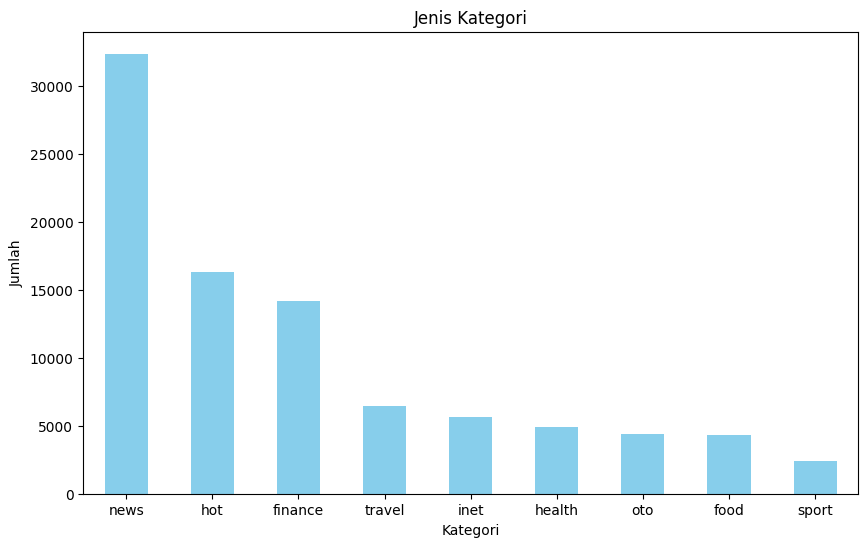

In [67]:
import matplotlib.pyplot as plt

# Menghitung nilai count dari setiap kategori
category_counts = df['category'].value_counts()

# Membuat bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Jenis Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()


In [68]:
def rem_punc(text):
    tokens = nltk.regexp_tokenize(text, r'\w+')
    return ' '.join(tokens)

def rem_stop(text):
    tokens = word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)

def stem_text(text):
    tokens = word_tokenize(text)
    stemmed_tokens = [PorterStemmer().stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

def lemma_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [WordNetLemmatizer().lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

def preprocessing_text(text):
    text = text.strip()
    text = text.lower()
    text = rem_punc(text)
    text = rem_stop(text)
    text = stem_text(text)
    text = lemma_text(text)
    return text

In [69]:
df['title'] = df['title'].apply(preprocessing_text)

In [70]:
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

In [71]:
# Tokenize all titles and count word frequencies
all_words = ' '.join(df['title']).split()
word_freq = Counter(all_words)

# Get the top 10 most used words
top_10_words = word_freq.most_common(10)

# Convert to DataFrame for better visualization
top_10_df = pd.DataFrame(top_10_words, columns=['Word', 'Frequency'])

# Display the DataFrame
print(top_10_df)

        Word  Frequency
0     corona      17264
1         rp       3157
2       viru       3084
3          5       2879
4     polisi       2733
5    positif       2690
6  indonesia       2501
7      warga       2495
8      rumah       2468
9          2       2416


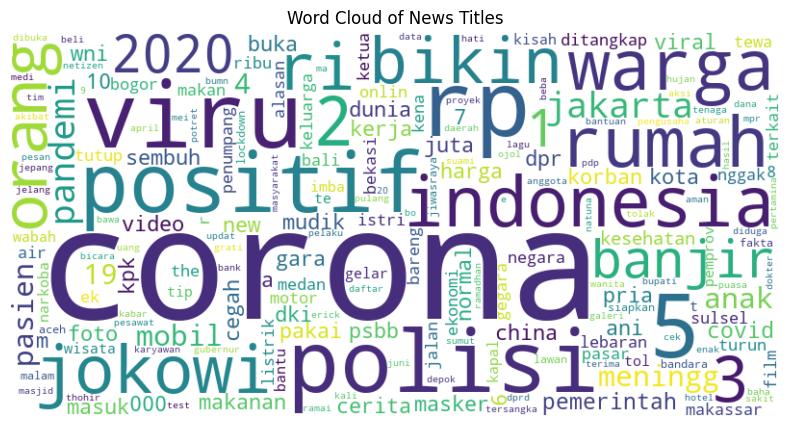

In [72]:
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of News Titles')
plt.show()

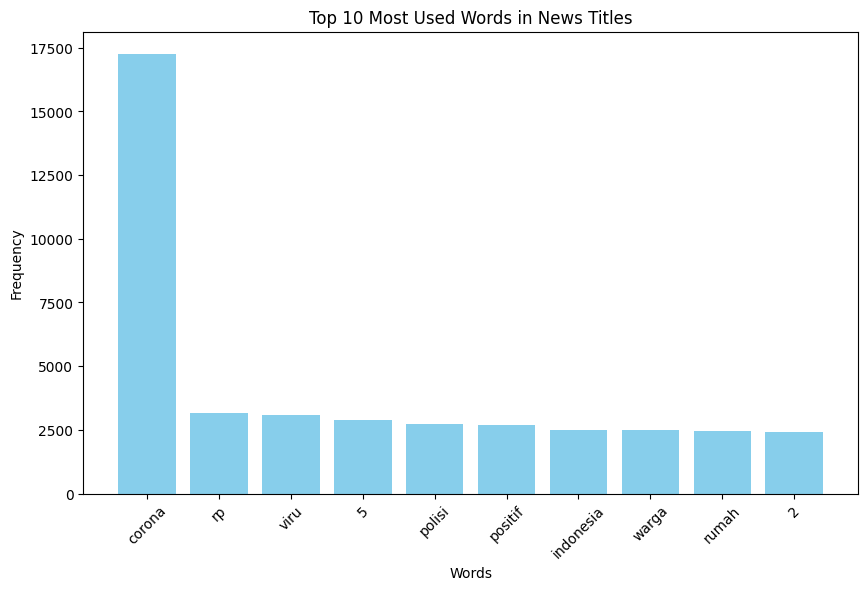

In [73]:
# Plot the word frequencies
plt.figure(figsize=(10, 6))
plt.bar(top_10_df['Word'], top_10_df['Frequency'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words in News Titles')
plt.xticks(rotation=45)
plt.show()

In [74]:
df['category'].value_counts()

category
news       32360
hot        16330
finance    14168
travel      6466
inet        5640
health      4919
oto         4383
food        4315
sport       2436
Name: count, dtype: int64

In [75]:
df['category'] = df['category'].replace({
    'news': 0,
    'hot': 1,
    'finance': 2,
    'travel': 3,
    'inet': 4,
    'health': 5,
    'oto': 6,
    'food': 7,
    'sport': 8,
})

In [76]:
df.head()

,title,category
0,kemnak awasi tka meikarta,2
1,bni digitalkan bni java jazz 2020,2
2,terbang australia edhi prabowo genjot budi day...,2
3,ojk siapkan stimulu ekonomi antisipasi dampak ...,2
4,saran ani rk mangkir rapat banjir dpr,2


In [77]:
x = df['title']
y = df['category']

In [78]:
x = np.array(x)

In [79]:
y = np.array(y)

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [81]:
vocab_size = 9000
embedding_dim = 16
max_length = 100
trunc_type = 'post'
oov_tok = '<OOV>'

In [82]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(x_train)

sequences = tokenizer.texts_to_sequences(x_train)
padded = pad_sequences(sequences, maxlen = max_length, truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(x_test)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length)

In [83]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [84]:
opti = tf.keras.optimizers.Adam()
model.compile(loss='sparse_categorical_crossentropy', optimizer=opti, metrics=['accuracy'])

In [89]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 100, 16)        │       144,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_9 (Bidirectional) │ (None, 100, 128)       │        41,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_10                │ (None, 100, 128)       │        98,816 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_11                │ (None, 64)             │        41,216 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 24)             │         1,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 9)              │           225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 981,869 (3.75 MB)

 Trainable params: 327,289 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 654,580 (2.50 MB)

In [86]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') >= 0.85:
            print("\nstop")
            self.model.stop_training = True

callbacks = myCallback()

In [87]:
history = model.fit(padded, y_train, epochs=20, batch_size=128,
                    validation_data=(testing_padded, y_test),
                    callbacks=[callbacks])

Epoch 1/20
569/569 ━━━━━━━━━━━━━━━━━━━━ 224s 383ms/step - accuracy: 0.4625 - loss: 1.5899 - val_accuracy: 0.7028 - val_loss: 0.8797
Epoch 2/20
569/569 ━━━━━━━━━━━━━━━━━━━━ 234s 411ms/step - accuracy: 0.7283 - loss: 0.7887 - val_accuracy: 0.7643 - val_loss: 0.7224
Epoch 3/20
569/569 ━━━━━━━━━━━━━━━━━━━━ 200s 352ms/step - accuracy: 0.8195 - loss: 0.5661 - val_accuracy: 0.8095 - val_loss: 0.6013
Epoch 4/20
569/569 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step - accuracy: 0.8615 - loss: 0.4480
stop
569/569 ━━━━━━━━━━━━━━━━━━━━ 205s 360ms/step - accuracy: 0.8614 - loss: 0.4480 - val_accuracy: 0.8197 - val_loss: 0.5695


In [88]:
news_test = [
    "Presiden Jokowi","Nastar kue Lebaran","Lionel Messi menang piala dunia"
]

news_seq_test = tokenizer.texts_to_sequences(news_test)
news_pad_test = pad_sequences(news_seq_test, maxlen=max_length)

pred = model.predict(news_pad_test)

labels = {
    0:'news',
    1:'hot',
    2:'finance',
    3:'travel',
    4:'internet',
    5:'health',
    6:'otomotif',
    7:'food',
    8:'sport',
}

for i, news in enumerate(news_test):
    predicted_label = labels[np.argmax(pred[i])]
    print(f"Berita: {news}")
    print(f"Prediksi: {predicted_label}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 760ms/step
Berita: Presiden Jokowi
Prediksi: finance

Berita: Nastar kue Lebaran
Prediksi: food

Berita: Lionel Messi menang piala dunia
Prediksi: sport

